## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np

First things first, let's unpack bom.movie_gross.csv.gz and see if we can extract any useful info out of that

In [2]:
#using pandas read.csv() to import and read the CSV file
bom_df = pd.read_csv("zippedData/bom.movie_gross.csv.gz", compression = 'gzip')
bom_df['foreign_gross'].value_counts()

1200000      23
1100000      14
1900000      12
4200000      12
2500000      11
             ..
391000        1
286000        1
160800000     1
87800000      1
172100000     1
Name: foreign_gross, Length: 1204, dtype: int64

In [3]:
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
print(bom_df.dtypes)

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object


Looks like foreign_gross is listed as an object even though it should be an int. Lets try and convert it so it doesn't mess with our analytics

In [5]:
#bom_df['foreign_gross'].astype(int)

#ValueError: cannot convert float NaN to integer

Looks like there are some NaN values for movies that were domestic only, since they did not show abroad it makes sense to convert their values to 0

In [6]:
bom_df['foreign_gross'] = bom_df['foreign_gross'].fillna(0)
print(bom_df['foreign_gross'].dtypes)

object


In [7]:
#try this again, this time we'll cast it as a float64 like the domestic_gross column
#bom_df['foreign_gross'].astype(np.float64)

#ValueError: could not convert string to float: '1,131.6'

It looks like there are some entries that are representing billions as thousands of millions (1,131.6 = 1131600000)

In [8]:
bom_df.iloc[1872]

title             Star Wars: The Force Awakens
studio                                      BV
domestic_gross                       9.367e+08
foreign_gross                          1,131.6
year                                      2015
Name: 1872, dtype: object

In [9]:
bom_df.iloc[500]

title             My Afternoons with Margueritte
studio                                     Cohen
domestic_gross                            667000
foreign_gross                           13600000
year                                        2011
Name: 500, dtype: object

In [10]:
bom_df.iloc[1870:1874]

,title,studio,domestic_gross,foreign_gross,year
1870,Open Windows,Cdgm.,1800.0,0,2014
1871,Mr. Pip,Free,1700.0,0,2014
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015


In [11]:
',' in bom_df.iloc[1872]['foreign_gross']

True

In [12]:
',' in bom_df.iloc[500]['foreign_gross']

False

Looks like we have a way to select only the columns that contain billions by looking for the comma. Let's apply a lambda function using .map()

In [13]:
bom_df.iloc[1870:1880]

,title,studio,domestic_gross,foreign_gross,year
1870,Open Windows,Cdgm.,1800.0,0,2014
1871,Mr. Pip,Free,1700.0,0,2014
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
1874,Furious 7,Uni.,353000000.0,"1,163.0",2015
1875,Avengers: Age of Ultron,BV,459000000.0,946400000,2015
1876,Minions,Uni.,336000000.0,823400000,2015
1877,Spectre,Sony,200100000.0,680600000,2015
1878,Inside Out,BV,356500000.0,501100000,2015
1879,Mission: Impossible - Rogue Nation,Par.,195000000.0,487700000,2015


In [14]:
bom_df['foreign_gross'] = bom_df['foreign_gross'].map\
            (lambda x: (float(x.replace(',', ''))*1000000) if (',' in str(x)) else x)

In [15]:
bom_df.iloc[1870:1880]

,title,studio,domestic_gross,foreign_gross,year
1870,Open Windows,Cdgm.,1800.0,0,2014
1871,Mr. Pip,Free,1700.0,0,2014
1872,Star Wars: The Force Awakens,BV,936700000.0,1.1316e+09,2015
1873,Jurassic World,Uni.,652300000.0,1.0194e+09,2015
1874,Furious 7,Uni.,353000000.0,1.163e+09,2015
1875,Avengers: Age of Ultron,BV,459000000.0,946400000,2015
1876,Minions,Uni.,336000000.0,823400000,2015
1877,Spectre,Sony,200100000.0,680600000,2015
1878,Inside Out,BV,356500000.0,501100000,2015
1879,Mission: Impossible - Rogue Nation,Par.,195000000.0,487700000,2015


In [16]:
bom_df['foreign_gross'] = bom_df['foreign_gross'].astype(float)

Looks like we were able to successfully wrangle foreign_gross into something usable. Lets double check the data type is correct and then boot up matplotlib

In [17]:
bom_df['foreign_gross'].dtype

dtype('float64')

In [18]:
import matplotlib.pyplot as plt

In [19]:
#still need to remove NaN values from domestic column
bom_df['domestic_gross'] = bom_df['domestic_gross'].fillna(0)

In [20]:
#here im adding a new column, total_gross, that is the sum of foreign and domestic
bom_df['total_gross'] = bom_df['domestic_gross'] + bom_df['foreign_gross']

In [21]:
#now im going to preview it to make sure it looks good and then sort everything by that column
bom_df.head(20)

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08
6,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08
7,Tangled,BV,200800000.0,391000000.0,2010,5.918000e+08
8,Despicable Me,Uni.,251500000.0,291600000.0,2010,5.431000e+08
9,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010,4.949000e+08


In [22]:
#sorting df by total gross, high to low
bom_df.sort_values('total_gross', ascending=False, inplace=True)

In [23]:
#now we will slice the top 50 movies and preview them in graph form
top_50 = bom_df.head(50)

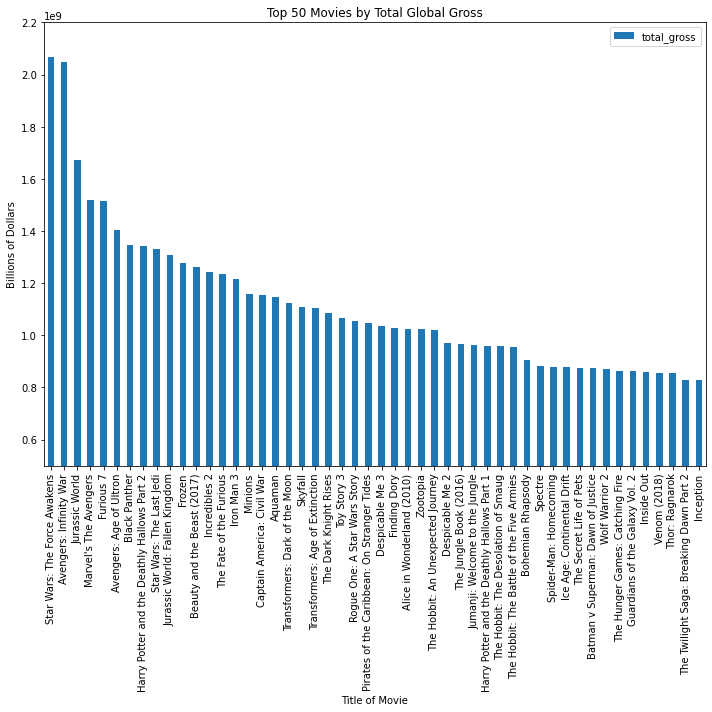

In [24]:
top_50.plot(x='title', y="total_gross", kind='bar', figsize = (10,10))
plt.title('Top 50 Movies by Total Global Gross')
plt.ylim(500000000, 2200000000)
plt.ylabel('Billions of Dollars')
plt.xlabel('Title of Movie')
plt.tight_layout();
plt.savefig('Top_50_Movies_Gross.png')

In [25]:
!ls

Above_7_Below_3_Genre.png
Above_9_Below_1_Genre.png
CONTRIBUTING.md
LICENSE.md
Most_Popular_Directors.png
README.md
Top_50_Movies_Gross.png
awesome.gif
im.db
movie_data_erd.jpeg
student.ipynb
zippedData


In [26]:
#import zipfile
#with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
   # zip_ref.extractall(directory_to_extract_to)

In [27]:
#now we will crack open the second file, im.db.zip
#first lets try and unzip it and put im.db in zippedData/im.db
import zipfile
with zipfile.ZipFile("zippedData/im.db.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [28]:
!ls "zippedData/"
#it looks like the file was succesfully created, now lets see if we can pull anything out of it

bom.movie_gross.csv.gz
im.db
im.db.zip
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


In [29]:
#to test im going to select the entire table movie_basics to get an overview of whats going on

In [30]:
import sqlite3
conn = sqlite3.connect("zippedData/im.db")

In [31]:
df = pd.read_sql(
"""
SELECT *
FROM movie_ratings
JOIN movie_basics
USING(movie_id)
WHERE numvotes >= 50;
""", conn)

#im selecting movie_ratings and joining movie_basics to get basic title info, as well as rating info.
#im going to be filtering for only rows with numvotes >= 50 to make sure that a very high score is not a statistical fluke

In [32]:
df.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
1,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
2,tt1069246,6.2,326,Habana Eva,Habana Eva,2010,106.0,"Comedy,Romance"
3,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport"
4,tt1130982,6.4,571,The Night Clerk,Avant l'aube,2011,104.0,"Drama,Thriller"


Looks like the unzipping was a success, now let's sort it based on averagerating and see what we have

In [33]:
df.sort_values('averagerating', ascending=False, inplace=True)

In [34]:
df.iloc[200:210]

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
8407,tt3828916,9.0,281,September 11: The New Pearl Harbor,September 11: The New Pearl Harbor,2013,300.0,Documentary
29596,tt8257128,9.0,92,Islam and the Future of Tolerance,Islam and the Future of Tolerance,2018,86.0,Documentary
4787,tt4156348,9.0,340,The Crucible,The Crucible,2014,190.0,Drama
32084,tt4265816,9.0,112,Adrenalin: The BMW Touring Car Story,Adrenalin: The BMW Touring Car Story,2014,123.0,"Documentary,Sport"
15741,tt4526656,9.0,61,For the Love of Ruth,For the Love of Ruth,2015,80.0,Drama
7602,tt5278386,9.0,51,Think and Grow Rich: The Legacy,Think and Grow Rich: The Legacy,2017,105.0,Documentary
22062,tt6050292,8.9,454,Conquering Southern China,Conquering Southern China,2016,101.0,Documentary
27371,tt6226212,8.9,427,Sand Angels,Sand Angels,2018,71.0,Family
17477,tt6239540,8.9,484,Apocalypse Will Not Happen,Apocalypse Will Not Happen,2015,79.0,Drama
28793,tt4493864,8.9,81,Gothic King Cobra,Gothic King Cobra,2014,63.0,Documentary


In [35]:
#looks like index 206 is the last row with a rating of 9.0 or higher
df_9_and_up = df[df['averagerating'] >= 9.0]
df_9_and_up

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
22841,tt9537008,9.9,417,Gini Helida Kathe,Gini Helida Kathe,2019,138.0,Drama
22235,tt9787524,9.7,72,DOSED,DOSED,2019,82.0,Documentary
36800,tt8718580,9.7,639,Eghantham,Eghantham,2018,125.0,Drama
31641,tt7131622,9.7,5600,Once Upon a Time ... in Hollywood,Once Upon a Time ... in Hollywood,2019,159.0,"Comedy,Drama"
32525,tt9760512,9.6,427,D/O Parvathamma,D/O Parvathamma,2019,NaN,Action
...,...,...,...,...,...,...,...,...
29596,tt8257128,9.0,92,Islam and the Future of Tolerance,Islam and the Future of Tolerance,2018,86.0,Documentary
4787,tt4156348,9.0,340,The Crucible,The Crucible,2014,190.0,Drama
32084,tt4265816,9.0,112,Adrenalin: The BMW Touring Car Story,Adrenalin: The BMW Touring Car Story,2014,123.0,"Documentary,Sport"
15741,tt4526656,9.0,61,For the Love of Ruth,For the Love of Ruth,2015,80.0,Drama


In [36]:
#now lets make a row of the worst of the worst
df_1_and_below = df[df["averagerating"] <= 1.0]
df_1_and_below

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
19836,tt1932655,1.0,342,It's a Kid's World,It's a Kid's World,2011,NaN,Family
27489,tt2100624,1.0,429,Good Morning to the World!!,Seikai gûdo mooningu!!,2010,81.0,Comedy
12349,tt4937514,1.0,388,A Light in the Distance,A no dentou,2014,53.0,Drama
31524,tt3216288,1.0,440,One Night: Choice of Evil,One Night: Choice of Evil,2010,79.0,"Comedy,Drama,Romance"
33042,tt7831076,1.0,96,"Yes, Sir! 7","Yes, Sir! 7",2016,111.0,"Comedy,Drama"
701,tt1611056,1.0,449,Hito no sabaku,Hito no sabaku,2010,121.0,Drama
30119,tt5277828,1.0,268,Death Forest 3,Death Forest 3,2015,64.0,Horror
27422,tt1870432,1.0,489,Kamifûsen,Kamifûsen,2011,117.0,Drama
27448,tt1976600,1.0,436,Pick the Youth,Pi ke qing chun,2011,85.0,Drama
28858,tt4986830,1.0,453,Pure Hearts: Into Chinese Showbiz,Pure Hearts: Into Chinese Showbiz,2015,96.0,"Comedy,Drama"


In [37]:
#this function will take in a pandas series and a list of terms to search for, and it will return
#a dictionary of all of the values with the number of occurences of each in the pandas series.
#It will also pick apart entries that are multiple column-seperated values into individual values

In [38]:
def freq_hunter(series, list_of_terms):#returns dictionary of value counts
    term_dict = {}
    for term in list_of_terms:
        term_dict[term] = 0
    for datum in series.iteritems():
        if isinstance(datum[1], str):
            for term in term_dict:
                if term in datum[1].split(","):
                    term_dict[term] += 1
    return term_dict

In [39]:
#im now looking to make a list of all the genres to feed into the previous function
genre_list = []
for item in df['genres'].value_counts().iteritems():
    genre_list.append(item[0].split(','))
#print(genre_list)
#now i want to flatten this list, so ill loop through it and make a new one
genre_list_flattened = []
for item in genre_list:
    for sub_item in item:#it only goes 2 deep, this should be enough
        genre_list_flattened.append(sub_item)
print(genre_list_flattened)

['Drama', 'Comedy', 'Documentary', 'Comedy', 'Drama', 'Horror', 'Drama', 'Romance', 'Comedy', 'Romance', 'Comedy', 'Drama', 'Romance', 'Thriller', 'Horror', 'Thriller', 'Drama', 'Thriller', 'Action', 'Action', 'Crime', 'Drama', 'Crime', 'Drama', 'Thriller', 'Comedy', 'Horror', 'Crime', 'Drama', 'Romance', 'Horror', 'Mystery', 'Thriller', 'Action', 'Thriller', 'Action', 'Drama', 'Documentary', 'Music', 'Biography', 'Documentary', 'Drama', 'Family', 'Action', 'Comedy', 'Drama', 'Horror', 'Thriller', 'Family', 'Adventure', 'Animation', 'Comedy', 'Action', 'Crime', 'Thriller', 'Drama', 'Mystery', 'Thriller', 'Comedy', 'Drama', 'Family', 'Biography', 'Drama', 'Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Mystery', 'Action', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Action', 'Drama', 'Thriller', 'Drama', 'Horror', 'Mystery', 'Comedy', 'Crime', 'Drama', 'Documentary', 'History', 'Biography', 'Drama', 'History', 'Crime', 'Thriller', 'Biography', 'Documentary', 'History', 'Action', 'Adv

In [40]:
#now to get rid of all non-unique values
genre_list_final = list(set(genre_list_flattened))
print(genre_list_final)

['Crime', 'Sport', 'Romance', 'News', 'Reality-TV', 'Fantasy', 'Family', 'Thriller', 'Music', 'Western', 'Action', 'Documentary', 'Game-Show', 'Drama', 'Adult', 'Mystery', 'Musical', 'Adventure', 'History', 'Horror', 'Sci-Fi', 'Comedy', 'Biography', 'War', 'Animation']


now that we have our list of unique genres, as well as our function parse a series and return a frequency table of genres, I will apply the function to our dataframes of the best and worst rated movies (with more than 50 votes)

In [41]:
#parsing best of
best_of_value_counts = freq_hunter(df_9_and_up['genres'], genre_list_final)
best_copy = freq_hunter(df_9_and_up['genres'], genre_list_final)
print(best_of_value_counts)

{'Crime': 5, 'Sport': 9, 'Romance': 5, 'News': 0, 'Reality-TV': 0, 'Fantasy': 0, 'Family': 11, 'Thriller': 2, 'Music': 11, 'Western': 1, 'Action': 5, 'Documentary': 113, 'Game-Show': 0, 'Drama': 75, 'Adult': 0, 'Mystery': 4, 'Musical': 3, 'Adventure': 8, 'History': 8, 'Horror': 3, 'Sci-Fi': 0, 'Comedy': 19, 'Biography': 14, 'War': 4, 'Animation': 1}


In [42]:
#parsing worst of
worst_of_value_counts = freq_hunter(df_1_and_below['genres'], genre_list_final)
worst_copy = freq_hunter(df_1_and_below['genres'], genre_list_final)
print(worst_of_value_counts)
print(worst_copy)

{'Crime': 0, 'Sport': 0, 'Romance': 4, 'News': 0, 'Reality-TV': 0, 'Fantasy': 2, 'Family': 3, 'Thriller': 0, 'Music': 0, 'Western': 0, 'Action': 1, 'Documentary': 1, 'Game-Show': 0, 'Drama': 17, 'Adult': 0, 'Mystery': 1, 'Musical': 0, 'Adventure': 3, 'History': 0, 'Horror': 5, 'Sci-Fi': 0, 'Comedy': 12, 'Biography': 1, 'War': 0, 'Animation': 1}
{'Crime': 0, 'Sport': 0, 'Romance': 4, 'News': 0, 'Reality-TV': 0, 'Fantasy': 2, 'Family': 3, 'Thriller': 0, 'Music': 0, 'Western': 0, 'Action': 1, 'Documentary': 1, 'Game-Show': 0, 'Drama': 17, 'Adult': 0, 'Mystery': 1, 'Musical': 0, 'Adventure': 3, 'History': 0, 'Horror': 5, 'Sci-Fi': 0, 'Comedy': 12, 'Biography': 1, 'War': 0, 'Animation': 1}


Let's take a look at this data in a graphical format

In [43]:
print(worst_copy)

{'Crime': 0, 'Sport': 0, 'Romance': 4, 'News': 0, 'Reality-TV': 0, 'Fantasy': 2, 'Family': 3, 'Thriller': 0, 'Music': 0, 'Western': 0, 'Action': 1, 'Documentary': 1, 'Game-Show': 0, 'Drama': 17, 'Adult': 0, 'Mystery': 1, 'Musical': 0, 'Adventure': 3, 'History': 0, 'Horror': 5, 'Sci-Fi': 0, 'Comedy': 12, 'Biography': 1, 'War': 0, 'Animation': 1}


These sample sizes are different sizes, ill need to adjust each of them accordingly to get a true representation

In [44]:
#adjust things according to sample size (i think this is just std dev) and then pick the best 1-2 genres (looks right now like
#documentary is a shoe-in for sure)
#Then try and delve into actors/directors for the best 1-2 genres to get a specific reccomendation of genre, director, star

In [45]:
def adjust_size(raw_list):#this function takes in a dictionary of key-value pairs and adjusts the numerical values to % of mean
    mean_h = 0
    adjusted_list = raw_list
    for num in adjusted_list.values():
        mean_h += num
    for key in adjusted_list.keys():
        adj_num = (adjusted_list[key]/mean_h)
        raw_list[key] = adj_num
    return adjusted_list

In [46]:
test_dict = {
    "Alpha":10,
    "Omega":13,
    "Zeta":22
}

In [47]:
test_expected_result = {
    "Alpha":(10/45),
    "Omega":(13/45),
    "Zeta":(22/45)
}
print(test_expected_result)

{'Alpha': 0.2222222222222222, 'Omega': 0.28888888888888886, 'Zeta': 0.4888888888888889}


In [48]:
test_result = adjust_size(test_dict)
print(test_result == test_expected_result)

True


Looks like the function is working as intended. Now I'll use it to adjust the previous dictionaries to display what percentage of the entire share of "awards" each genre captures

In [49]:
print("Original:", worst_of_value_counts)
worst_of_adj = adjust_size(worst_of_value_counts)
print("Modified:", worst_of_adj)

Original: {'Crime': 0, 'Sport': 0, 'Romance': 4, 'News': 0, 'Reality-TV': 0, 'Fantasy': 2, 'Family': 3, 'Thriller': 0, 'Music': 0, 'Western': 0, 'Action': 1, 'Documentary': 1, 'Game-Show': 0, 'Drama': 17, 'Adult': 0, 'Mystery': 1, 'Musical': 0, 'Adventure': 3, 'History': 0, 'Horror': 5, 'Sci-Fi': 0, 'Comedy': 12, 'Biography': 1, 'War': 0, 'Animation': 1}
Modified: {'Crime': 0.0, 'Sport': 0.0, 'Romance': 0.0784313725490196, 'News': 0.0, 'Reality-TV': 0.0, 'Fantasy': 0.0392156862745098, 'Family': 0.058823529411764705, 'Thriller': 0.0, 'Music': 0.0, 'Western': 0.0, 'Action': 0.0196078431372549, 'Documentary': 0.0196078431372549, 'Game-Show': 0.0, 'Drama': 0.3333333333333333, 'Adult': 0.0, 'Mystery': 0.0196078431372549, 'Musical': 0.0, 'Adventure': 0.058823529411764705, 'History': 0.0, 'Horror': 0.09803921568627451, 'Sci-Fi': 0.0, 'Comedy': 0.23529411764705882, 'Biography': 0.0196078431372549, 'War': 0.0, 'Animation': 0.0196078431372549}


In [50]:
print("Original:", best_of_value_counts)
best_of_adj = adjust_size(best_of_value_counts)
print("Modified:", best_of_adj)

Original: {'Crime': 5, 'Sport': 9, 'Romance': 5, 'News': 0, 'Reality-TV': 0, 'Fantasy': 0, 'Family': 11, 'Thriller': 2, 'Music': 11, 'Western': 1, 'Action': 5, 'Documentary': 113, 'Game-Show': 0, 'Drama': 75, 'Adult': 0, 'Mystery': 4, 'Musical': 3, 'Adventure': 8, 'History': 8, 'Horror': 3, 'Sci-Fi': 0, 'Comedy': 19, 'Biography': 14, 'War': 4, 'Animation': 1}
Modified: {'Crime': 0.016611295681063124, 'Sport': 0.029900332225913623, 'Romance': 0.016611295681063124, 'News': 0.0, 'Reality-TV': 0.0, 'Fantasy': 0.0, 'Family': 0.036544850498338874, 'Thriller': 0.006644518272425249, 'Music': 0.036544850498338874, 'Western': 0.0033222591362126247, 'Action': 0.016611295681063124, 'Documentary': 0.3754152823920266, 'Game-Show': 0.0, 'Drama': 0.24916943521594684, 'Adult': 0.0, 'Mystery': 0.013289036544850499, 'Musical': 0.009966777408637873, 'Adventure': 0.026578073089700997, 'History': 0.026578073089700997, 'Horror': 0.009966777408637873, 'Sci-Fi': 0.0, 'Comedy': 0.06312292358803986, 'Biography':

In [51]:
print(best_copy, worst_copy)

{'Crime': 5, 'Sport': 9, 'Romance': 5, 'News': 0, 'Reality-TV': 0, 'Fantasy': 0, 'Family': 11, 'Thriller': 2, 'Music': 11, 'Western': 1, 'Action': 5, 'Documentary': 113, 'Game-Show': 0, 'Drama': 75, 'Adult': 0, 'Mystery': 4, 'Musical': 3, 'Adventure': 8, 'History': 8, 'Horror': 3, 'Sci-Fi': 0, 'Comedy': 19, 'Biography': 14, 'War': 4, 'Animation': 1} {'Crime': 0, 'Sport': 0, 'Romance': 4, 'News': 0, 'Reality-TV': 0, 'Fantasy': 2, 'Family': 3, 'Thriller': 0, 'Music': 0, 'Western': 0, 'Action': 1, 'Documentary': 1, 'Game-Show': 0, 'Drama': 17, 'Adult': 0, 'Mystery': 1, 'Musical': 0, 'Adventure': 3, 'History': 0, 'Horror': 5, 'Sci-Fi': 0, 'Comedy': 12, 'Biography': 1, 'War': 0, 'Animation': 1}


<ipython-input-52-2ba67015aebb>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(w_labels_adj, rotation = 90)
<ipython-input-52-2ba67015aebb>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(w_labels_adj, rotation = 90)


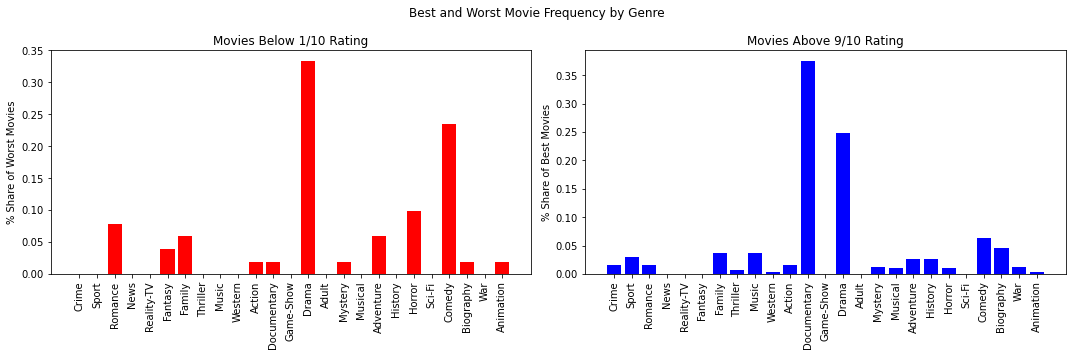

In [52]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,10))
labels = list(best_of_value_counts.keys())
bars = list(best_of_value_counts.values())
w_labels_adj = list(worst_of_adj.keys())
w_bars_adj = list(worst_of_adj.values())
b_bars_adj = list(best_of_adj.values())
ax1.bar(w_labels_adj, w_bars_adj, color = 'r', label="Worst Movies")
ax1.set_xticklabels(w_labels_adj, rotation = 90)
ax1.title.set_text("Movies Below 1/10 Rating")
ax1.set_ylabel('% Share of Worst Movies')
ax2.bar(w_labels_adj, b_bars_adj, color = 'b', label="Best Movies")
ax2.set_xticklabels(w_labels_adj, rotation = 90)
ax2.set_ylabel('% Share of Best Movies')
fig.set_size_inches(15,5)
ax2.title.set_text("Movies Above 9/10 Rating")
fig.suptitle("Best and Worst Movie Frequency by Genre")
fig.tight_layout()
#plt.savefig('Above_9_Below_1_Genre.png')

In [53]:
#Lets redo this with good (>7/10) and bad (<3/10)

In [54]:
df_good = df[df['averagerating'] >= 7.0]
df_good.head(20)

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
22841,tt9537008,9.9,417,Gini Helida Kathe,Gini Helida Kathe,2019,138.0,Drama
22235,tt9787524,9.7,72,DOSED,DOSED,2019,82.0,Documentary
36800,tt8718580,9.7,639,Eghantham,Eghantham,2018,125.0,Drama
31641,tt7131622,9.7,5600,Once Upon a Time ... in Hollywood,Once Upon a Time ... in Hollywood,2019,159.0,"Comedy,Drama"
32525,tt9760512,9.6,427,D/O Parvathamma,D/O Parvathamma,2019,NaN,Action
9956,tt9343826,9.6,808,Ananthu V/S Nusrath,Ananthu V/S Nusrath,2018,149.0,"Comedy,Drama,Family"
29990,tt4329396,9.6,78,Trenches of Rock,Trenches of Rock,2017,87.0,"Documentary,Drama,Music"
1990,tt9680166,9.6,624,Yeh Suhaagraat Impossible,Yeh Suhaagraat Impossible,2019,92.0,Comedy
27082,tt4131686,9.6,1339,I Want to Live,I Want to Live,2015,106.0,"Adventure,Biography,Documentary"
31721,tt8751896,9.6,98,Gangter in Morteni,Gangter in Morteni,2017,69.0,Drama


In [55]:
df_bad = df[df['averagerating'] < 3.0]
df_bad.head(20)

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
14477,tt6224010,2.9,69,The Skint,As o pas,2016,86.0,"Comedy,Family,Fantasy"
20396,tt1263018,2.9,288,The Devil Within,The Devil Within,2010,80.0,Thriller
22977,tt2184267,2.9,153,Saint Dracula 3D,Saint Dracula 3D,2012,120.0,"Horror,Romance,Thriller"
2029,tt1343704,2.9,4877,Time You Change,Zeiten ändern Dich,2010,94.0,"Biography,Drama,Music"
24291,tt1776363,2.9,63,Yakshiyum Njanum,Yakshiyum Njanum,2010,146.0,"Drama,Horror"
10158,tt1808679,2.9,267,Wojna zensko-meska,Wojna zensko-meska,2011,105.0,Comedy
12173,tt3561204,2.9,129,Friends Don't Let Friends,Friends Don't Let Friends,2017,84.0,"Horror,Thriller"
36431,tt2513864,2.9,247,House on the Hill,House on the Hill,2012,85.0,"Crime,Horror"
11143,tt2909124,2.9,837,Blood Widow,Blood Widow,2014,84.0,Horror
23107,tt2649366,2.9,72,Punishment,Punishment,2013,117.0,Thriller


In [56]:
good = freq_hunter(df_good['genres'], genre_list_final)
good_copy = freq_hunter(df_good['genres'], genre_list_final)
print(good)

{'Crime': 642, 'Sport': 296, 'Romance': 811, 'News': 121, 'Reality-TV': 0, 'Fantasy': 197, 'Family': 426, 'Thriller': 651, 'Music': 472, 'Western': 20, 'Action': 827, 'Documentary': 3414, 'Game-Show': 0, 'Drama': 4396, 'Adult': 0, 'Mystery': 290, 'Musical': 111, 'Adventure': 542, 'History': 613, 'Horror': 206, 'Sci-Fi': 145, 'Comedy': 1663, 'Biography': 958, 'War': 178, 'Animation': 368}


In [57]:
bad = freq_hunter(df_bad['genres'], genre_list_final)
bad_copy = freq_hunter(df_bad['genres'], genre_list_final)
print(bad)

{'Crime': 50, 'Sport': 6, 'Romance': 67, 'News': 0, 'Reality-TV': 0, 'Fantasy': 61, 'Family': 32, 'Thriller': 189, 'Music': 12, 'Western': 10, 'Action': 235, 'Documentary': 22, 'Game-Show': 0, 'Drama': 227, 'Adult': 1, 'Mystery': 47, 'Musical': 8, 'Adventure': 110, 'History': 14, 'Horror': 397, 'Sci-Fi': 124, 'Comedy': 305, 'Biography': 8, 'War': 18, 'Animation': 17}


In [58]:
good_adj = adjust_size(good)
print(good_adj)

{'Crime': 0.03700928114371361, 'Sport': 0.01706346918775581, 'Romance': 0.04675159970023635, 'News': 0.006975269499048827, 'Reality-TV': 0.0, 'Fantasy': 0.01135643050671586, 'Family': 0.024557560385080994, 'Thriller': 0.03752810284198997, 'Music': 0.02720931573182683, 'Western': 0.0011529371072807979, 'Action': 0.04767394938606099, 'Documentary': 0.19680636421283218, 'Game-Show': 0.0, 'Drama': 0.25341557618031935, 'Adult': 0.0, 'Mystery': 0.01671758805557157, 'Musical': 0.006398800945408428, 'Adventure': 0.031244595607309623, 'History': 0.03533752233815645, 'Horror': 0.011875252204992217, 'Sci-Fi': 0.008358794027785785, 'Comedy': 0.09586672047039833, 'Biography': 0.05522568743875022, 'War': 0.0102611402547991, 'Animation': 0.02121404277396668}


In [59]:
bad_adj = adjust_size(bad)
print(bad_adj)

{'Crime': 0.025510204081632654, 'Sport': 0.003061224489795918, 'Romance': 0.034183673469387756, 'News': 0.0, 'Reality-TV': 0.0, 'Fantasy': 0.031122448979591835, 'Family': 0.0163265306122449, 'Thriller': 0.09642857142857143, 'Music': 0.006122448979591836, 'Western': 0.00510204081632653, 'Action': 0.11989795918367346, 'Documentary': 0.011224489795918367, 'Game-Show': 0.0, 'Drama': 0.11581632653061225, 'Adult': 0.0005102040816326531, 'Mystery': 0.023979591836734693, 'Musical': 0.004081632653061225, 'Adventure': 0.05612244897959184, 'History': 0.007142857142857143, 'Horror': 0.20255102040816325, 'Sci-Fi': 0.06326530612244897, 'Comedy': 0.1556122448979592, 'Biography': 0.004081632653061225, 'War': 0.009183673469387756, 'Animation': 0.008673469387755102}


<ipython-input-60-87a34cade355>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels, rotation = 90)
<ipython-input-60-87a34cade355>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels, rotation = 90)


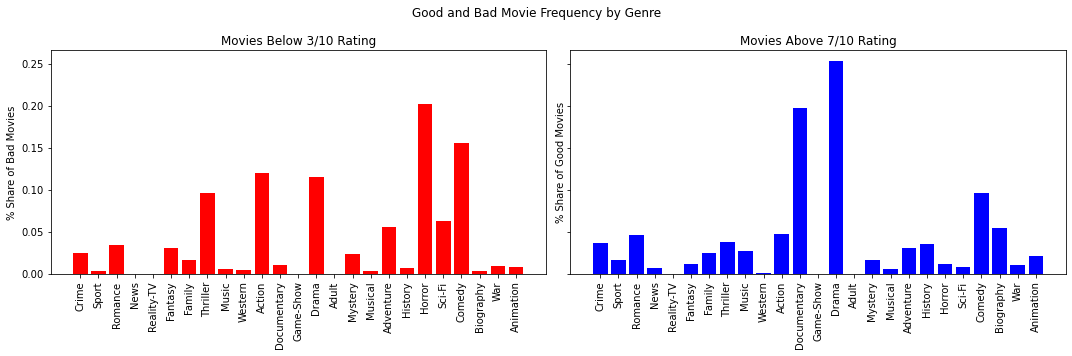

In [60]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

labels = list(good_adj.keys())
bad_bars_adj = list(bad_adj.values())
good_bars_adj = list(good_adj.values())

ax1.bar(labels, bad_bars_adj, color = 'r', label="Movies Below 3/10 Rating")
ax1.set_xticklabels(labels, rotation = 90)
ax1.title.set_text("Movies Below 3/10 Rating")
ax1.set_ylabel("% Share of Bad Movies")

ax2.bar(labels, good_bars_adj, color = 'b', label="Movies Above 7/10 Rating")
ax2.set_xticklabels(labels, rotation = 90)
ax2.title.set_text("Movies Above 7/10 Rating")
ax2.set_ylabel("% Share of Good Movies")

fig.set_size_inches(15,5)
fig.suptitle("Good and Bad Movie Frequency by Genre")
fig.tight_layout()
plt.savefig('Above_7_Below_3_Genre.png')

now lets try and crack into directors/actors

In [61]:
df_2 = pd.read_sql("""
SELECT 
    primary_name AS Director_Name,
    primary_profession,
    primary_title as Movie_Title,
    genres,
    averagerating,
    numvotes
FROM directors
JOIN persons
USING(person_id)
JOIN movie_basics
USING(movie_id)
JOIN movie_ratings
USING(movie_id)
WHERE numvotes > 1000
""", conn) #filtering to only include movies with more than 1000 votes to avoid unknown directors
df_2

,Director_Name,primary_profession,Movie_Title,genres,averagerating,numvotes
0,Renny Harlin,"producer,director,writer",The Legend of Hercules,"Action,Adventure,Fantasy",4.2,50352
1,Renny Harlin,"producer,director,writer",The Legend of Hercules,"Action,Adventure,Fantasy",4.2,50352
2,Renny Harlin,"producer,director,writer",The Legend of Hercules,"Action,Adventure,Fantasy",4.2,50352
3,Renny Harlin,"producer,director,writer",The Legend of Hercules,"Action,Adventure,Fantasy",4.2,50352
4,Oren Kaplan,"director,editorial_department,camera_department",The Hammer,"Biography,Drama,Sport",7.0,1613
...,...,...,...,...,...,...
26622,Gowtam Tinnanuri,None,Jersey,"Drama,Sport",9.0,1778
26623,Omung Kumar,"art_department,art_director,production_designer",PM Narendra Modi,"Biography,Drama",3.7,4057
26624,Omung Kumar,"art_department,art_director,production_designer",PM Narendra Modi,"Biography,Drama",3.7,4057
26625,Omung Kumar,"art_department,art_director,production_designer",PM Narendra Modi,"Biography,Drama",3.7,4057


In [62]:
#this function will parse through the director_name and generate a list of unique directors
def generate_director_list(series):
    director_list_raw = []
    for item in series:
        director_list_raw.append(item)
    director_list = sorted(list(set(director_list_raw)))
    return director_list

In [63]:
#lets try it out
list_of_directors = generate_director_list(df_2['Director_Name'])
print("Total Length: {}".format(len(list_of_directors)))
print(list_of_directors)

Total Length: 7021
['A. Karunakaran', 'A. Taner Elhan', 'A. Todd Smith', 'A.G. Amid', 'A.J. Edwards', 'A.K. Sajan', 'A.L. Vijay', 'A.R. Murugadoss', 'Aanand L. Rai', 'Aaron Biebert', 'Aaron Hann', 'Aaron Harvey', 'Aaron Horvath', 'Aaron K. Carter', 'Aaron Katz', 'Aaron Kaufman', 'Aaron Keeling', 'Aaron Moorhead', 'Aaron Nee', 'Aaron Seltzer', 'Aaron Sorkin', 'Aaron T. Wells', 'Aaron Woodley', 'Aashiq Abu', 'Aatish Kapadia', 'Abbas Alibhai Burmawalla', 'Abbas Kiarostami', 'Abbas Tyrewala', 'Abby Kohn', 'Abdellatif Kechiche', 'Abderrahmane Sissako', 'Abdolreza Kahani', 'Abdullah Oguz', 'Abe Sylvia', 'Abel Ferrara', 'Abel Lanzac', 'Abel Vang', 'Abhay Chopra', 'Abhijit Panse', 'Abhinav Kashyap', 'Abhinay Deo', 'Abhiraj Minawala', 'Abhishek Chaubey', 'Abhishek Dogra', 'Abhishek Jain', 'Abhishek Kapoor', 'Abhishek Sharma', 'Abhishek Varman', 'Abi Varghese', 'Abner Pastoll', 'Abolhassan Davoodi', 'Abram Cox', 'Abrid Shine', 'Abu Shahed Emon', 'Aclan Bates', 'Adam Alleca', 'Adam Brooks', 'Adam

In [64]:
df_test = df_2.loc[df_2['Director_Name'] == "Jay Chandrasekhar"].drop_duplicates()

In [65]:
len(df_test['averagerating'])

2

In [66]:
#this function will take the previously parsed director list, and will return a dictionary of each director's average rating
def determine_rating(df_to_parse, list_to_parse, ratings_column, director_column):
    ratings_dict = {} #create final product, empty dict
    for item in list_to_parse:
        temp_df = df_to_parse.loc[df_to_parse[director_column] == item].drop_duplicates() #create temp df with current director
        temp_rating = 0
        for rating in temp_df[ratings_column]: #add up all of the ratings and divide by length to get avg for this director
            temp_rating += rating
        this_rating = temp_rating / len(temp_df[ratings_column])
        ratings_dict[item] = this_rating
    return ratings_dict

In [67]:
#lets try it out, fingers crossed


In [68]:
director_ratings = determine_rating(df_2, list_of_directors, 'averagerating', 'Director_Name')
director_ratings

{'A. Karunakaran': 7.3,
 'A. Taner Elhan': 3.8,
 'A. Todd Smith': 5.6,
 'A.G. Amid': 7.7,
 'A.J. Edwards': 6.1,
 'A.K. Sajan': 6.5,
 'A.L. Vijay': 6.1,
 'A.R. Murugadoss': 7.042857142857143,
 'Aanand L. Rai': 6.925,
 'Aaron Biebert': 8.9,
 'Aaron Hann': 6.0,
 'Aaron Harvey': 4.9,
 'Aaron Horvath': 6.8,
 'Aaron K. Carter': 8.6,
 'Aaron Katz': 5.833333333333333,
 'Aaron Kaufman': 4.7,
 'Aaron Keeling': 5.3,
 'Aaron Moorhead': 5.925,
 'Aaron Nee': 6.0,
 'Aaron Seltzer': 3.675,
 'Aaron Sorkin': 7.5,
 'Aaron T. Wells': 3.5,
 'Aaron Woodley': 6.2,
 'Aashiq Abu': 7.566666666666667,
 'Aatish Kapadia': 7.2,
 'Abbas Alibhai Burmawalla': 5.033333333333332,
 'Abbas Kiarostami': 7.15,
 'Abbas Tyrewala': 6.2,
 'Abby Kohn': 5.4,
 'Abdellatif Kechiche': 7.033333333333334,
 'Abderrahmane Sissako': 7.2,
 'Abdolreza Kahani': 6.7,
 'Abdullah Oguz': 6.7,
 'Abe Sylvia': 6.5,
 'Abel Ferrara': 5.266666666666667,
 'Abel Lanzac': 7.6,
 'Abel Vang': 4.3,
 'Abhay Chopra': 7.2,
 'Abhijit Panse': 5.3,
 'Abhinav Kas

In [69]:
director_ratings['Jay Chandrasekhar']

5.55

In [70]:
len(director_ratings)

7021

In [71]:
director_ratings_above_9 = {}
for director in director_ratings:
    if director_ratings[director] >= 9.0:
        director_ratings_above_9[director] = director_ratings[director]
len(director_ratings_above_9)
director_ratings_above_9

{'Amitabh Reza Chowdhury': 9.3,
 'Amudhavan Karuppiah': 9.4,
 'Anjana Krishnakumar': 9.4,
 'Arturs Lapinskis': 9.2,
 'Bayu Skak': 9.0,
 'Bharatha Hettiarachchi': 9.5,
 'Brent E. Huffman': 9.1,
 'Chathra Weeraman': 9.5,
 'Chris Delforce': 9.2,
 'Dipendra K. Khanal': 9.0,
 'Donavon Warren': 9.3,
 'Fajar Nugros': 9.0,
 'Gowtam Tinnanuri': 9.0,
 'Karzan Kardozi': 9.6,
 'Maha Venkatesh': 9.2,
 'Mahesh Manjrekar': 9.2,
 'Mari Selvaraj': 9.0,
 'Nikoloz Khomasuridze': 9.6,
 'Prabunath': 9.0,
 'Putrama Tuta': 9.1,
 'Tanel Toom': 9.3,
 'Tauquir Ahmed': 9.1,
 'Tim Gagliardo': 9.3}

In [72]:
df_direct_9 = pd.DataFrame(director_ratings_above_9.values(), index=director_ratings_above_9.keys())
df_direct_9.columns = ['Director']
df_direct_9
df_direct_9.sort_values(by='Director', ascending=False, inplace=True)

################################
################################
#DONT RE-RUN, USING INPLACE=TRUE

In [73]:
df_direct_9

,Director
Nikoloz Khomasuridze,9.6
Karzan Kardozi,9.6
Bharatha Hettiarachchi,9.5
Chathra Weeraman,9.5
Anjana Krishnakumar,9.4
Amudhavan Karuppiah,9.4
Amitabh Reza Chowdhury,9.3
Donavon Warren,9.3
Tanel Toom,9.3
Tim Gagliardo,9.3


In [74]:
director_ratings_8_9 = {}
for director in director_ratings:
    if director_ratings[director] >= 8.0 and director_ratings[director] < 9.0:
        director_ratings_8_9[director] = director_ratings[director]
len(director_ratings_8_9)
director_ratings_8_9

{'Aaron Biebert': 8.9,
 'Aaron K. Carter': 8.6,
 'Abhishek Jain': 8.5,
 'Aclan Bates': 8.0,
 'Adam Curtis': 8.25,
 'Adesh Prasad': 8.3,
 'Aditya Dhar': 8.6,
 'Adnan Sarwar': 8.6,
 'Adrian Molina': 8.4,
 'Advait Chandan': 8.0,
 'Akhtem Seitablaev': 8.3,
 'Alan Lowery': 8.5,
 'Alper Caglar': 8.200000000000001,
 'Anam Biswas': 8.2,
 'Anand Gandhi': 8.15,
 'André Singer': 8.0,
 'Anik Datta': 8.1,
 'Aniruddha Roy Chowdhury': 8.2,
 'Anonymous': 8.2,
 'Anthony Russo': 8.225000000000001,
 'Anup Bhandari': 8.5,
 'Anwar Rasheed': 8.3,
 'Arianne Benedetti': 8.8,
 'Arsen A. Ostojic': 8.2,
 'Arun Kumar': 8.1,
 'Arun Prabhu Purushothaman': 8.8,
 'Ashir Azeem': 8.4,
 'Audrius Juzenas': 8.2,
 'Ayman Jamal': 8.0,
 'Bahram Tavakoli': 8.0,
 'Bala': 8.0,
 'Balaji Sakthivel': 8.2,
 'Balaji Tharaneetharan': 8.2,
 'Banksy': 8.0,
 'Bilal Lashari': 8.1,
 'Bing Liu': 8.1,
 'Bob Persichetti': 8.5,
 'Boris Malagurski': 8.7,
 'Bruce Sinofsky': 8.1,
 'C. Prem Kumar': 8.8,
 'Can Ulkay': 8.45,
 'Cassie Jaye': 8.4,
 '

In [75]:
df_direct_8_9 = pd.DataFrame(director_ratings_8_9.values(), index=director_ratings_8_9.keys())
df_direct_8_9.columns = ['Director']
df_direct_8_9.sort_values(by='Director', ascending=False, inplace=True)

##############################
##############################
#DONT RERUN USING INPLACE=TRUE

In [76]:
df_direct_8_9 = df_direct_8_9.head(20)
df_direct_8_9

,Director
Aaron Biebert,8.90
Ezra Edelman,8.90
Tomasz Sekielski,8.90
Madhu C. Narayanan,8.90
Hemanth M. Rao,8.90
Leninbharati,8.90
Tim Van Someren,8.90
Arianne Benedetti,8.80
Dick Carruthers,8.80
Jun-Soo Park,8.80


In [77]:
df_direct_9.sort_values(by='Director', inplace=True)

In [78]:
df_direct_8_9 = df_direct_8_9.sort_values(by='Director')

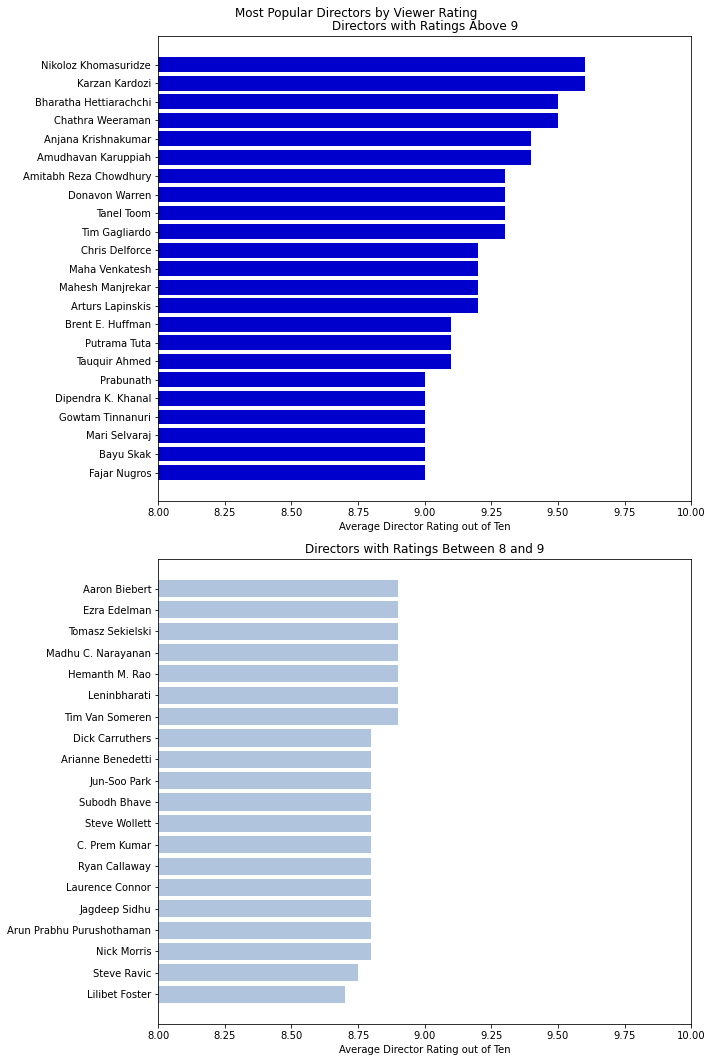

In [79]:
fig2, (ax3, ax4) = plt.subplots(nrows=2)
ax3.barh(df_direct_9.index, df_direct_9['Director'], color = 'mediumblue')
ax3.set_xlabel("Average Director Rating out of Ten")
ax4.set_xlabel("Average Director Rating out of Ten")
ax3.set_title("Directors with Ratings Above 9")
ax4.set_title("Directors with Ratings Between 8 and 9")
ax4.barh(df_direct_8_9.index, df_direct_8_9['Director'], color = 'lightsteelblue')
ax3.set_xlim((8,10))
ax4.set_xlim((8,10))
fig2.suptitle("Most Popular Directors by Viewer Rating")
fig2.set_size_inches(10,15)
plt.tight_layout()
plt.savefig('Most_Popular_Directors.png')

We now have assessed what the most successful genres were (based off of gross earnings and ratings), as well as the most popular directors (based off ratings). All that is left is to put it all together and make a business reccomendation